# Importing Dataset

In [2]:
try:
  with open("Data_2.txt", "r") as file:
    text = file.read()
  print(f"File Loaded Succesfully: {text}")
except FileNotFoundError:
  print("File not found")

File Loaded Succesfully: The big black dog barked at the white cat and chased away.


# POS Tagging Using NLTK

In [3]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [4]:
tokenized_text = word_tokenize(text)
print(tokenized_text)

['The', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away', '.']


In [5]:
nltk_postagged_text = nltk.pos_tag(tokenized_text)
print(nltk_postagged_text)

[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]


# POS Tagging using TextBlob

In [6]:
import nltk
from textblob import TextBlob

In [7]:
blob = TextBlob(text)
blob_tagged_text = blob.tags
print(blob_tagged_text)

[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]


# POS Tagging using Regular Expression

In [8]:
import nltk
from nltk.tokenize import word_tokenize

In [9]:
patterns = [
    (r'.*ed$', 'VBD'),
    (r'.*ing$', 'VBG'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
    (r'The|the|at|and', 'DT'),
    (r'.*', 'NN')
]

regexp_tagger = nltk.RegexpTagger(patterns)
tagger = nltk.tag.sequential.RegexpTagger(patterns)

tokenized_text = word_tokenize(text)

regexp_tagged_text = tagger.tag(tokenized_text)
print(regexp_tagged_text)

[('The', 'DT'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'DT'), ('the', 'DT'), ('white', 'NN'), ('cat', 'NN'), ('and', 'DT'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')]


In [13]:
patterns2 = [
    (r'(?i)^the$', 'DT'),
    (r'^at$', 'IN'),
    (r'^and$', 'CC'),
    (r'^away$', 'RB'),
    (r'^(big|black|white)$', 'JJ'),
    (r'.*ed$', 'VBD'),
    (r'.*', 'NN')
]

regexp_tagger2 = nltk.RegexpTagger(patterns2)
tagger2 = nltk.tag.sequential.RegexpTagger(patterns2)

tokenized_text = word_tokenize(text)

regexp_tagged_text2 = tagger2.tag(tokenized_text)
print(regexp_tagged_text2)

[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', 'NN')]


# Output Comparison

In [16]:
# NLTK POS tagged
print(f"NLTK: {nltk_postagged_text}")

# TextBlob POS tagged
print(f"TextBlob: {blob_tagged_text}")

# Regular Expression POS tagged
print(f"Regular Expression: {regexp_tagged_text}")

# Better Regular Expression POS tagged
print(f"Better Regular Expression: {regexp_tagged_text2}")

NLTK: [('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]
TextBlob: [('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]
Regular Expression: [('The', 'DT'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'DT'), ('the', 'DT'), ('white', 'NN'), ('cat', 'NN'), ('and', 'DT'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')]
Better Regular Expression: [('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', 'NN')]


# Parse Tree

In [17]:
# SVG or Scalable Vector Graphics is used to display graphics
%pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.2 MB/s eta 0:00:00


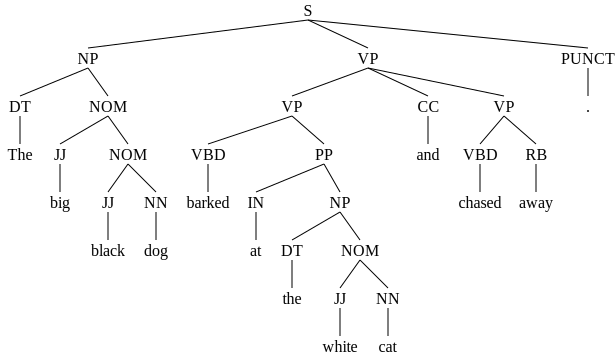

In [21]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP PUNCT
NP -> DT NOM
NOM -> JJ NOM | JJ NN
VP -> VP CC VP | VBD PP | VBD RB
PP -> IN NP
DT -> 'The' | 'the'
JJ -> 'big' | 'black' | 'white'
NN -> 'dog' | 'cat'
VBD -> 'barked' | 'chased'
IN -> 'at'
CC -> 'and'
RB -> 'away'
PUNCT -> '.'
""")

parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(tokenized_text):
  display(tree)